C:\Users\ssp1_\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16695 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
 14  SO2                 16695 non-null  int64  
dtypes: float64(2), int64(6), object

C:\Users\ssp1_\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


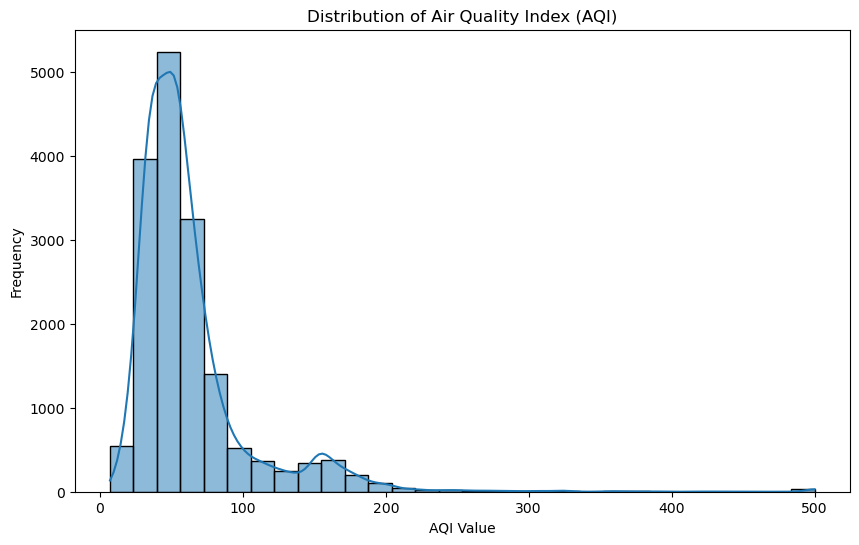

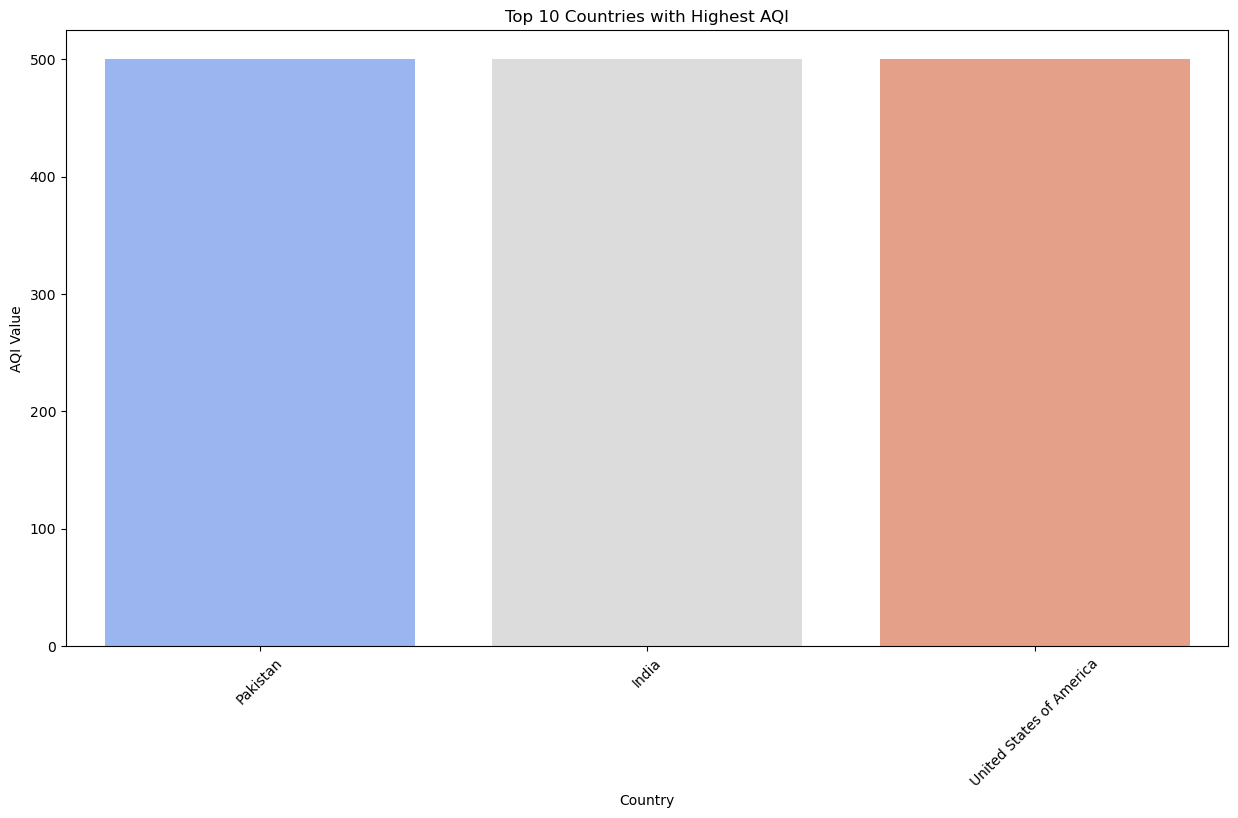

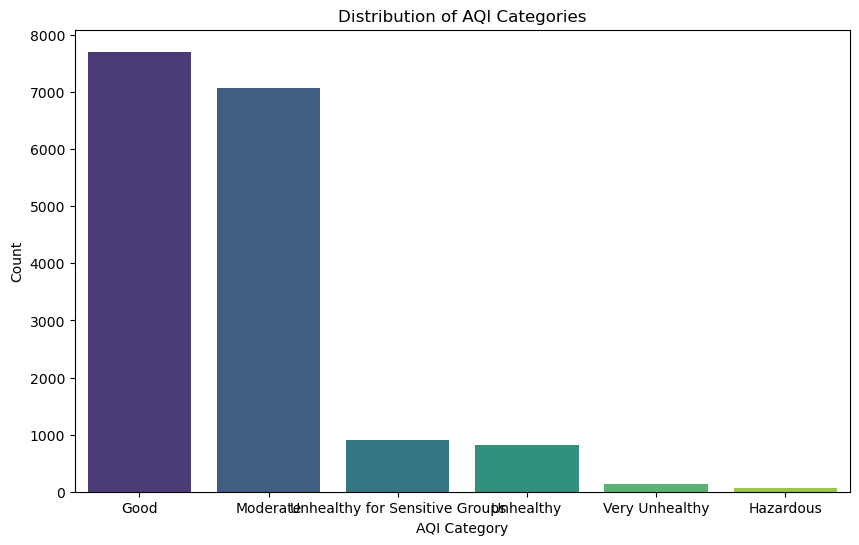

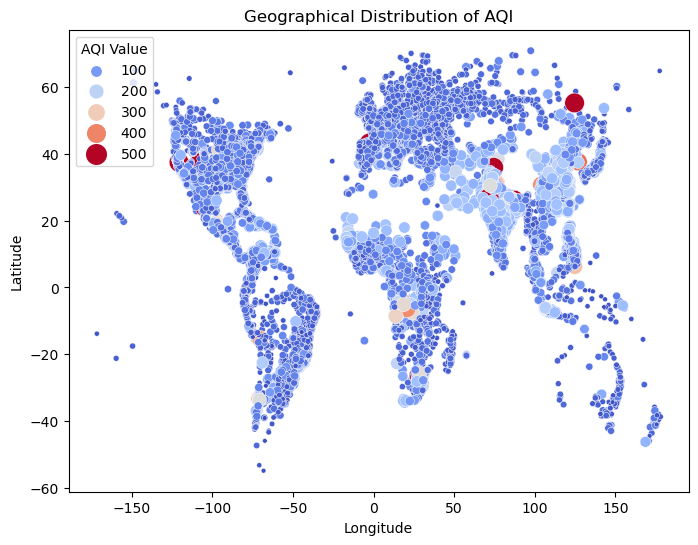

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\ssp1_\Downloads\AQI and Lat Long of Countries complete.csv'
aqi_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:\n")
print(aqi_data.info())
print("\nSummary Statistics:\n")
print(aqi_data.describe())
print("\nFirst Few Rows:\n")
print(aqi_data.head())

# Check for missing values
print("\nMissing Values:\n")
print(aqi_data.isnull().sum())

# Basic statistics and distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(aqi_data['AQI Value'], kde=True, bins=30)
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

# Analyzing AQI levels across countries
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=aqi_data.nlargest(10, 'AQI Value'), x='Country', y='AQI Value', palette='coolwarm')
plt.title('Top 10 Countries with Highest AQI')
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

# Categorize AQI levels based on common AQI standards
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

aqi_data['AQI_Category'] = aqi_data['AQI Value'].apply(categorize_aqi)

# Visualize the distribution of AQI categories
plt.figure(figsize=(10, 6))
sns.countplot(data=aqi_data, x='AQI_Category', order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'], palette='viridis')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.show()

# Check correlation between latitude, longitude, and AQI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aqi_data, x='lng', y='lat', hue='AQI Value', size='AQI Value', palette='coolwarm', sizes=(10, 200))
plt.title('Geographical Distribution of AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='AQI Value', loc='upper left')
plt.show()
